In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import pandas as pd
import datetime
now = datetime.datetime.now

# Data Loading and Preprocessing

In [2]:
#import creep data
creep_df = pd.read_csv('../Data/SS316_dataset.csv')
creep_df


,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,Ti,Al,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature,creep_rupture_life
0,0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,0.0110,0.015,0.0010,0.0300,0.020,55,61,235,650,29.2
1,1,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,0.0110,0.018,0.0005,0.0340,0.010,68,78,157,700,34.5
2,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,72,77,235,650,38.8
3,18,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,0.0006,0.011,0.0010,0.0810,0.001,106,80,177,700,39.0
4,8,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,0.0290,0.021,0.0007,0.0224,0.010,75,83,157,700,40.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,41,55,118,600,142185.9
613,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,26,39,108,600,152758.0
614,2,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,0.0550,0.027,0.0013,0.0350,0.020,28,37,108,600,173814.3
615,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,25,23,41,700,178190.4


In [3]:
Log_Creep_Life = np.log10(creep_df['creep_rupture_life'])
creep_df['Log_Creep_Life'] = Log_Creep_Life
creep_df = creep_df.drop(columns = ['creep_rupture_life'])

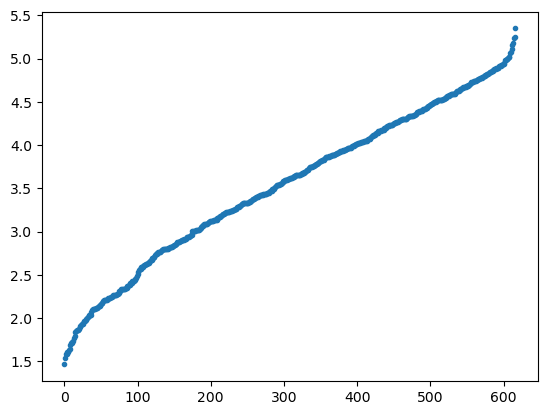

In [4]:
plt.plot(creep_df['Log_Creep_Life'], '.')

In [5]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Material           617 non-null    int64  
 1   C                  617 non-null    float64
 2   Si                 617 non-null    float64
 3   Mn                 617 non-null    float64
 4   P                  617 non-null    float64
 5   S                  617 non-null    float64
 6   Ni                 617 non-null    float64
 7   Cr                 617 non-null    float64
 8   Mo                 617 non-null    float64
 9   Cu                 617 non-null    float64
 10  Ti                 617 non-null    float64
 11  Al                 617 non-null    float64
 12  B                  617 non-null    float64
 13  N                  617 non-null    float64
 14  Nb+Ta              617 non-null    float64
 15  Elongation         617 non-null    int64  
 16  Reduction of Area  617 non

In [6]:
features = creep_df.iloc[:, 0:19]
targets = creep_df.iloc[:, 19]
features

,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,Ti,Al,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature
0,0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,0.0110,0.015,0.0010,0.0300,0.020,55,61,235,650
1,1,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,0.0110,0.018,0.0005,0.0340,0.010,68,78,157,700
2,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,72,77,235,650
3,18,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,0.0006,0.011,0.0010,0.0810,0.001,106,80,177,700
4,8,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,0.0290,0.021,0.0007,0.0224,0.010,75,83,157,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,41,55,118,600
613,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,26,39,108,600
614,2,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,0.0550,0.027,0.0013,0.0350,0.020,28,37,108,600
615,6,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,25,23,41,700


# Model Training

In [7]:
# rmse loss
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Run # 1 Fold # 1


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:32.575840


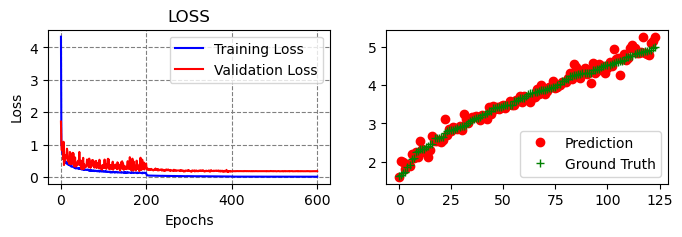

Pearson CC: 0.9889600769194027
R2 score: 0.9767852770904328
RMSE: 0.13577514043805736
MAE: 1.0296576518464404
********************
Run # 1 Fold # 2


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:19.052890


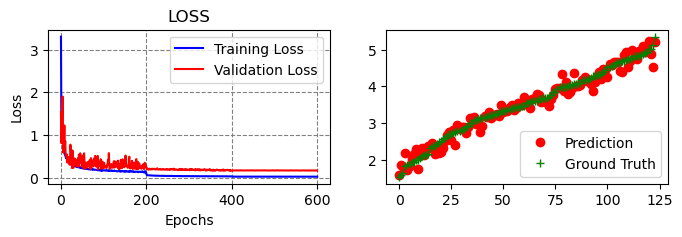

Pearson CC: 0.9841373826688933
R2 score: 0.9684151675552748
RMSE: 0.16484235615915638
MAE: 1.060262885352948
********************
Run # 1 Fold # 3


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:20.378095


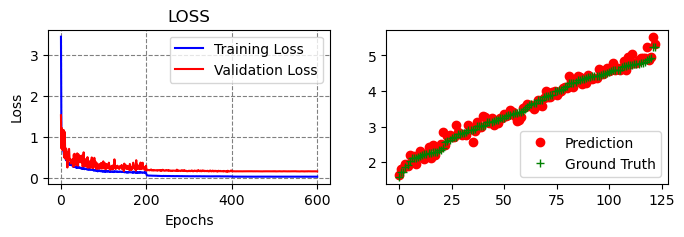

Pearson CC: 0.9913676868149065
R2 score: 0.9812126469359788
RMSE: 0.12874900289818805
MAE: 1.089617460214466
********************
Run # 1 Fold # 4


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:19.744259


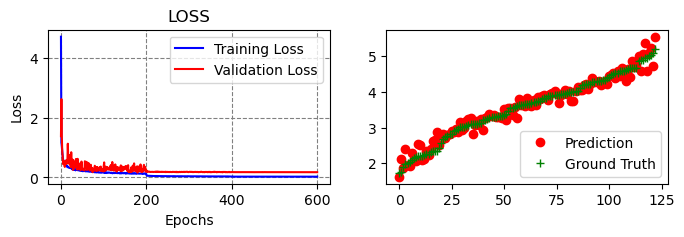

Pearson CC: 0.9824020860049489
R2 score: 0.9646403824679007
RMSE: 0.16215779487983137
MAE: 0.9709055443203153
********************
Run # 1 Fold # 5


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\data_adapter.py:1505: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Training time: 0:01:18.350787


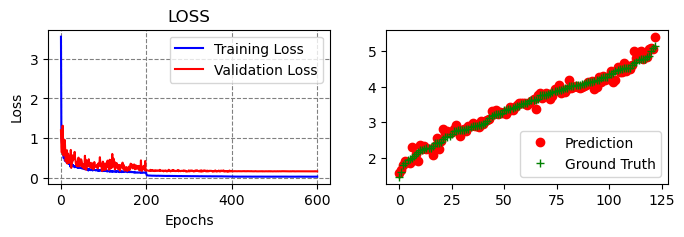

Pearson CC: 0.9918112866097962
R2 score: 0.9833720239167137
RMSE: 0.113374183769375
MAE: 1.0115429861282943
********************


In [8]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=50+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            # define DNN
            model = Sequential()
            model.add(Input(shape=(19,)))
            model.add(Dense(1000,activation='relu'))
            model.add(Dense(200,activation='relu'))
            model.add(Dense(40,activation='relu'))
            model.add(Dense(1,activation='linear'))

            model.compile(optimizer= 'RMSprop', loss=root_mean_squared_error)

            # learning rate scheduler
            import math
            INITIAL_LEARNING_RATE = 0.01
            EPOCHS_NUM = 600
            def lr_step_decay(epoch, lr):
                drop_rate = 0.1
                epochs_drop = 200
                return INITIAL_LEARNING_RATE * math.pow(drop_rate, math.floor(epoch/epochs_drop))

            callbacks=[LearningRateScheduler(lr_step_decay, verbose=0)]

            # Fit model
            t = now()
            history = model.fit(x_train, y_train, batch_size=16, epochs=EPOCHS_NUM,
                                validation_split=0.2, verbose=0, callbacks=callbacks)
            print('Training time: %s' % (now() - t))

            # Plot the loss and the predictions
            train_loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochsn = np.arange(1, len(train_loss)+1,1)
            plt.figure(figsize=(8, 2))
            plt.subplot(1,2,1)
            plt.plot(epochsn,train_loss, 'b', label='Training Loss')
            plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
            plt.grid(color='gray', linestyle='--')
            plt.legend()
            plt.title('LOSS')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.subplot(1,2,2)
            y_pred_test = model.predict(x_test, verbose=0)
            plt.plot(y_pred_test, 'ro', label='Prediction')
            plt.plot(np.array(y_test), 'g+', label='Ground Truth')
            plt.legend(loc=4)
            plt.show()

            # Evaluate metrics
            PearsonCC[j, i] = pearsonr(y_test, np.squeeze(y_pred_test))[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = np.sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-np.array(y_test)))

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')

            print(20*'*')

In [9]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.988960,0.976785,0.135775,1.029658
1,0.984137,0.968415,0.164842,1.060263
2,0.991368,0.981213,0.128749,1.089617
3,0.982402,0.964640,0.162158,0.970906
4,0.991811,0.983372,0.113374,1.011543


In [10]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.987736,0.003813,0.974885,0.007246,0.14098,0.019782,1.032397,0.04068
